# Sports Celebrity Image Classification: Data Cleaning

In [42]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
img = cv2.imread('./dataset/Virat_Kohli/9.jpg')
img.shape

(612, 395, 3)

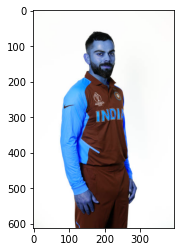

In [44]:
plt.imshow(img)

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 395)

In [46]:
gray

array([[251, 251, 251, ..., 247, 247, 247],
       [251, 251, 251, ..., 247, 247, 247],
       [251, 251, 251, ..., 247, 247, 247],
       ...,
       [243, 243, 243, ..., 248, 248, 248],
       [242, 243, 243, ..., 247, 247, 247],
       [242, 242, 243, ..., 247, 247, 247]], dtype=uint8)

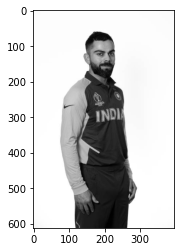

In [47]:
plt.imshow(gray, cmap='gray')

In [48]:
face_cascade = cv2.CascadeClassifier('./server/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./server/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[159,  88,  90,  90]], dtype=int32)

In [49]:
(x,y,w,h) = faces[0]
x,y,w,h

(159, 88, 90, 90)

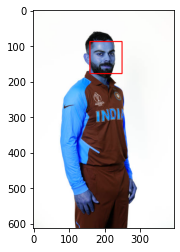

In [50]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

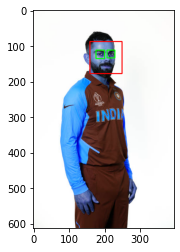

In [51]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

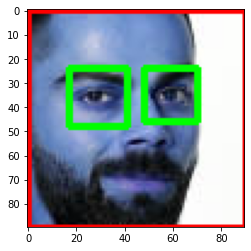

In [52]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [53]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

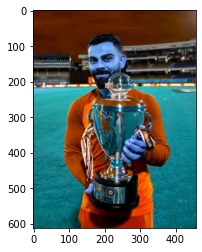

In [54]:
original_image = cv2.imread('./dataset/virat_Kohli/2.jpg')
plt.imshow(original_image)

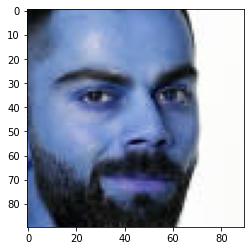

In [55]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/virat_Kohli/9.jpg')
plt.imshow(cropped_image)

# Now cropping Image

In [56]:
path_to_data = "./dataset/"
path_to_cr_data = "./cropped/"

In [57]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [58]:
img_dirs

['./dataset/Mary_Com',
 './dataset/Mithali_Raj',
 './dataset/MS_Dhoni',
 './dataset/PV_Sindhu',
 './dataset/Rahul_Dravis',
 './dataset/Saina_Nehwal',
 './dataset/Virat_Kohli']

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [60]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Mary_Com
Generating cropped images in folder:  ./cropped/Mary_Com
Mithali_Raj
Generating cropped images in folder:  ./cropped/Mithali_Raj
MS_Dhoni
Generating cropped images in folder:  ./cropped/MS_Dhoni
PV_Sindhu
Generating cropped images in folder:  ./cropped/PV_Sindhu
Rahul_Dravis
Generating cropped images in folder:  ./cropped/Rahul_Dravis
Saina_Nehwal
Generating cropped images in folder:  ./cropped/Saina_Nehwal
Virat_Kohli
Generating cropped images in folder:  ./cropped/Virat_Kohli


# Manually data cleaning